In [24]:
import sys
from rmc_tools import rmc6f_stuff
import copy

In [25]:
rmc6f_file_name = "ceramic.rmc6f"
lita_ul = 5.0
input_rmc_config = rmc6f_stuff.RMC6FReader(rmc6f_file_name)


Reading in the RMC6F configuration...
Progress: 
....5%....10%....15%....20%
....25%....30%....35%....40%
....45%....50%....55%....60%
....65%....70%....75%....80%
....85%....90%....95%....100%

------------------------------------------
RMC6F configuration successfully read in.
Time taken:      0.320 s
------------------------------------------


In [26]:
li_ta_coord_c = list()
for i in range(input_rmc_config.numAtoms):
    if input_rmc_config.atomsEle[i] == "Li":
        atom_coord_1 = input_rmc_config.atomsCoordInt[i]
        ta_num = 0
        for j in range(input_rmc_config.numAtoms):
            cond1 = input_rmc_config.atomsEle[j] == "Ta"
            if cond1:
                atom_coord_2 = input_rmc_config.atomsCoordInt[j]
                dist_temp = rmc6f_stuff.dist_calc_coord(
                    atom_coord_1, atom_coord_2,
                    input_rmc_config.vectors
                )
                if dist_temp <= lita_ul and dist_temp > 1.E-5:
                    ta_num += 1
        li_ta_coord_c.append(ta_num)

In [27]:
rmc6f_file_name = "glass_ceramic.rmc6f"
lita_ul = 5.0
input_rmc_config = rmc6f_stuff.RMC6FReader(rmc6f_file_name)


Reading in the RMC6F configuration...
Progress: 
....5%....10%....15%....20%
....25%....30%....35%....40%
....45%....50%....55%....60%
....65%....70%....75%....80%
....85%....90%....95%....100%

------------------------------------------
RMC6F configuration successfully read in.
Time taken:      0.208 s
------------------------------------------


In [28]:
li_ta_coord_gc = list()
for i in range(input_rmc_config.numAtoms):
    if input_rmc_config.atomsEle[i] == "Li":
        atom_coord_1 = input_rmc_config.atomsCoordInt[i]
        ta_num = 0
        for j in range(input_rmc_config.numAtoms):
            cond1 = input_rmc_config.atomsEle[j] == "Ta"
            if cond1:
                atom_coord_2 = input_rmc_config.atomsCoordInt[j]
                dist_temp = rmc6f_stuff.dist_calc_coord(
                    atom_coord_1, atom_coord_2,
                    input_rmc_config.vectors
                )
                if dist_temp <= lita_ul and dist_temp > 1.E-5:
                    ta_num += 1
        li_ta_coord_gc.append(ta_num)

In [29]:
rmc6f_file_name = "glass.rmc6f"
lita_ul = 5.0
input_rmc_config = rmc6f_stuff.RMC6FReader(rmc6f_file_name)


Reading in the RMC6F configuration...
Progress: 
....5%....10%....15%....20%
....25%....30%....35%....40%
....45%....50%....55%....60%
....65%....70%....75%....80%
....85%....90%....95%....100%

------------------------------------------
RMC6F configuration successfully read in.
Time taken:      0.288 s
------------------------------------------


In [30]:
li_ta_coord_g = list()
for i in range(input_rmc_config.numAtoms):
    if input_rmc_config.atomsEle[i] == "Li":
        atom_coord_1 = input_rmc_config.atomsCoordInt[i]
        ta_num = 0
        for j in range(input_rmc_config.numAtoms):
            cond1 = input_rmc_config.atomsEle[j] == "Ta"
            if cond1:
                atom_coord_2 = input_rmc_config.atomsCoordInt[j]
                dist_temp = rmc6f_stuff.dist_calc_coord(
                    atom_coord_1, atom_coord_2,
                    input_rmc_config.vectors
                )
                if dist_temp <= lita_ul and dist_temp > 1.E-5:
                    ta_num += 1
        li_ta_coord_g.append(ta_num)

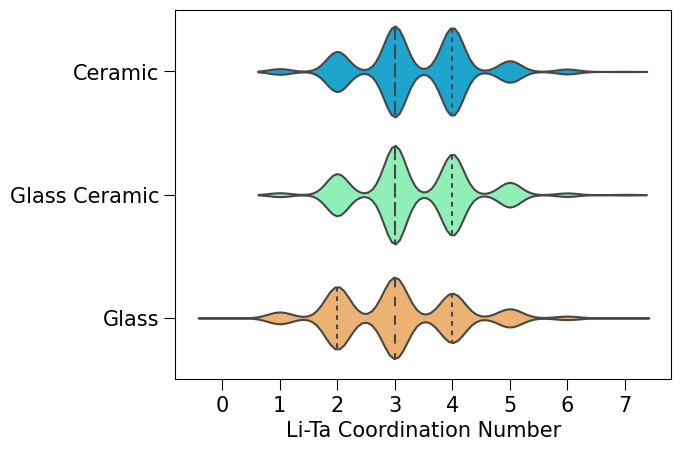

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Example data
data1 = li_ta_coord_c
data2 = li_ta_coord_gc
data3 = li_ta_coord_g

# Combine data into a DataFrame
import pandas as pd

df = pd.DataFrame({'Ceramic': data1, 'Glass Ceramic': data2, 'Glass': data3})

# Create horizontal violin plot
sns.violinplot(data=df, palette="rainbow", orient="h", inner="quart")
plt.xlabel('Li-Ta Coordination Number', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tick_params(axis='both', which='both', length=8)
plt.show()